In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy
from scipy import stats
import statsmodels.api as sm
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
import warnings
warnings.filterwarnings('ignore')

# EDA (Exploratory Data Analysis)

In [2]:
df = pd.read_csv("diabetes.csv")
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)2)
- DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
- Age: Age (years)
- Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

### Deal With Missing Values / Replacing 0s in Glucose, BloodPressure, SkinThickness, Insulin, BMI

In [185]:
cleaned_df = df.copy()

# Method 1: replacing all 0s with non-zero medians of each attribute
for col in cleaned_df.columns[1:6]:  # Glucose, BloodPressure, SkinThickness, Insulin, BMI
    median0 = cleaned_df.loc[(cleaned_df[col] > 0) & (cleaned_df['Outcome'] == 0), col].median()
    median1 = cleaned_df.loc[(cleaned_df[col] > 0) & (cleaned_df['Outcome'] == 1), col].median()
    cleaned_df.loc[(cleaned_df[col] == 0) & (cleaned_df['Outcome'] == 0), col] = median0
    cleaned_df.loc[(cleaned_df[col] == 0) & (cleaned_df['Outcome'] == 1), col] = median1
    print("Replacing all 0s in {} when Outcome = 0 with {}".format(col, median0))
    print("Replacing all 0s in {} when Outcome = 1 with {}".format(col, median1))
    
# # Method 2: drop all 0s
# df.loc[:,'Glucose':'BMI'].replace(0, np.nan, inplace=True)
# df.dropna(subset=['Glucose','BMI'], inplace=True)


Replacing all 0s in Glucose when Outcome = 0 with 107.0
Replacing all 0s in Glucose when Outcome = 1 with 140.0
Replacing all 0s in BloodPressure when Outcome = 0 with 70.0
Replacing all 0s in BloodPressure when Outcome = 1 with 74.5
Replacing all 0s in SkinThickness when Outcome = 0 with 27.0
Replacing all 0s in SkinThickness when Outcome = 1 with 32.0
Replacing all 0s in Insulin when Outcome = 0 with 102.5
Replacing all 0s in Insulin when Outcome = 1 with 169.5
Replacing all 0s in BMI when Outcome = 0 with 30.1
Replacing all 0s in BMI when Outcome = 1 with 34.3


In [186]:
cleaned_df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.677083      72.389323      29.089844  141.753906   
std       3.369578   30.464161      12.106039       8.890820   89.100847   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  102.500000   
50%       3.000000  117.000000      72.000000      28.000000  102.500000   
75%       6.000000  140.250000      80.000000      32.000000  169.500000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.434635                  0.471876   33.240885    0.348958  
std      6.880498                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.050000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

([<matplotlib.axis.XTick at 0x7fab98355a30>,
 [Text(0, 0, 'Pregnancies'),
  Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'SkinThickness'),
  Text(4, 0, 'Insulin'),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'DiabetesPedigreeFunction'),
  Text(7, 0, 'Age'),
  Text(8, 0, 'Outcome')])

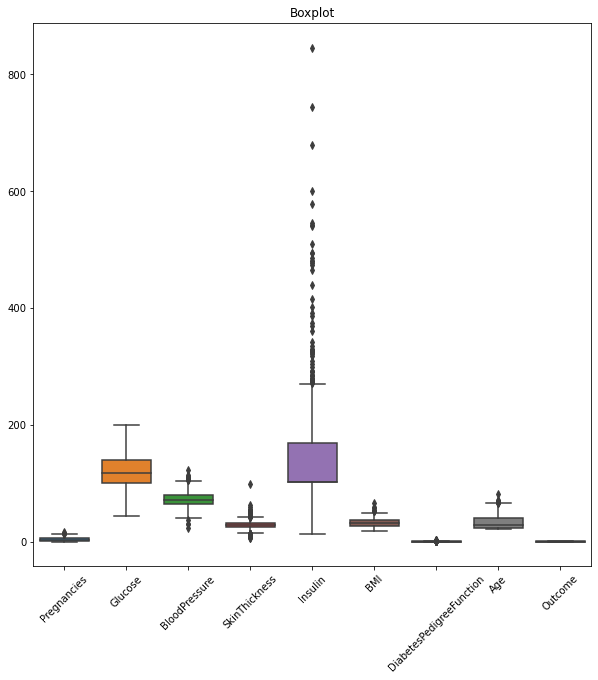

In [187]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.boxplot(data=cleaned_df, ax=ax)
plt.title("Boxplot")
feature_cols = cleaned_df.columns
x_values = list(range(len(feature_cols)))
plt.xticks(x_values, feature_cols, rotation=45)


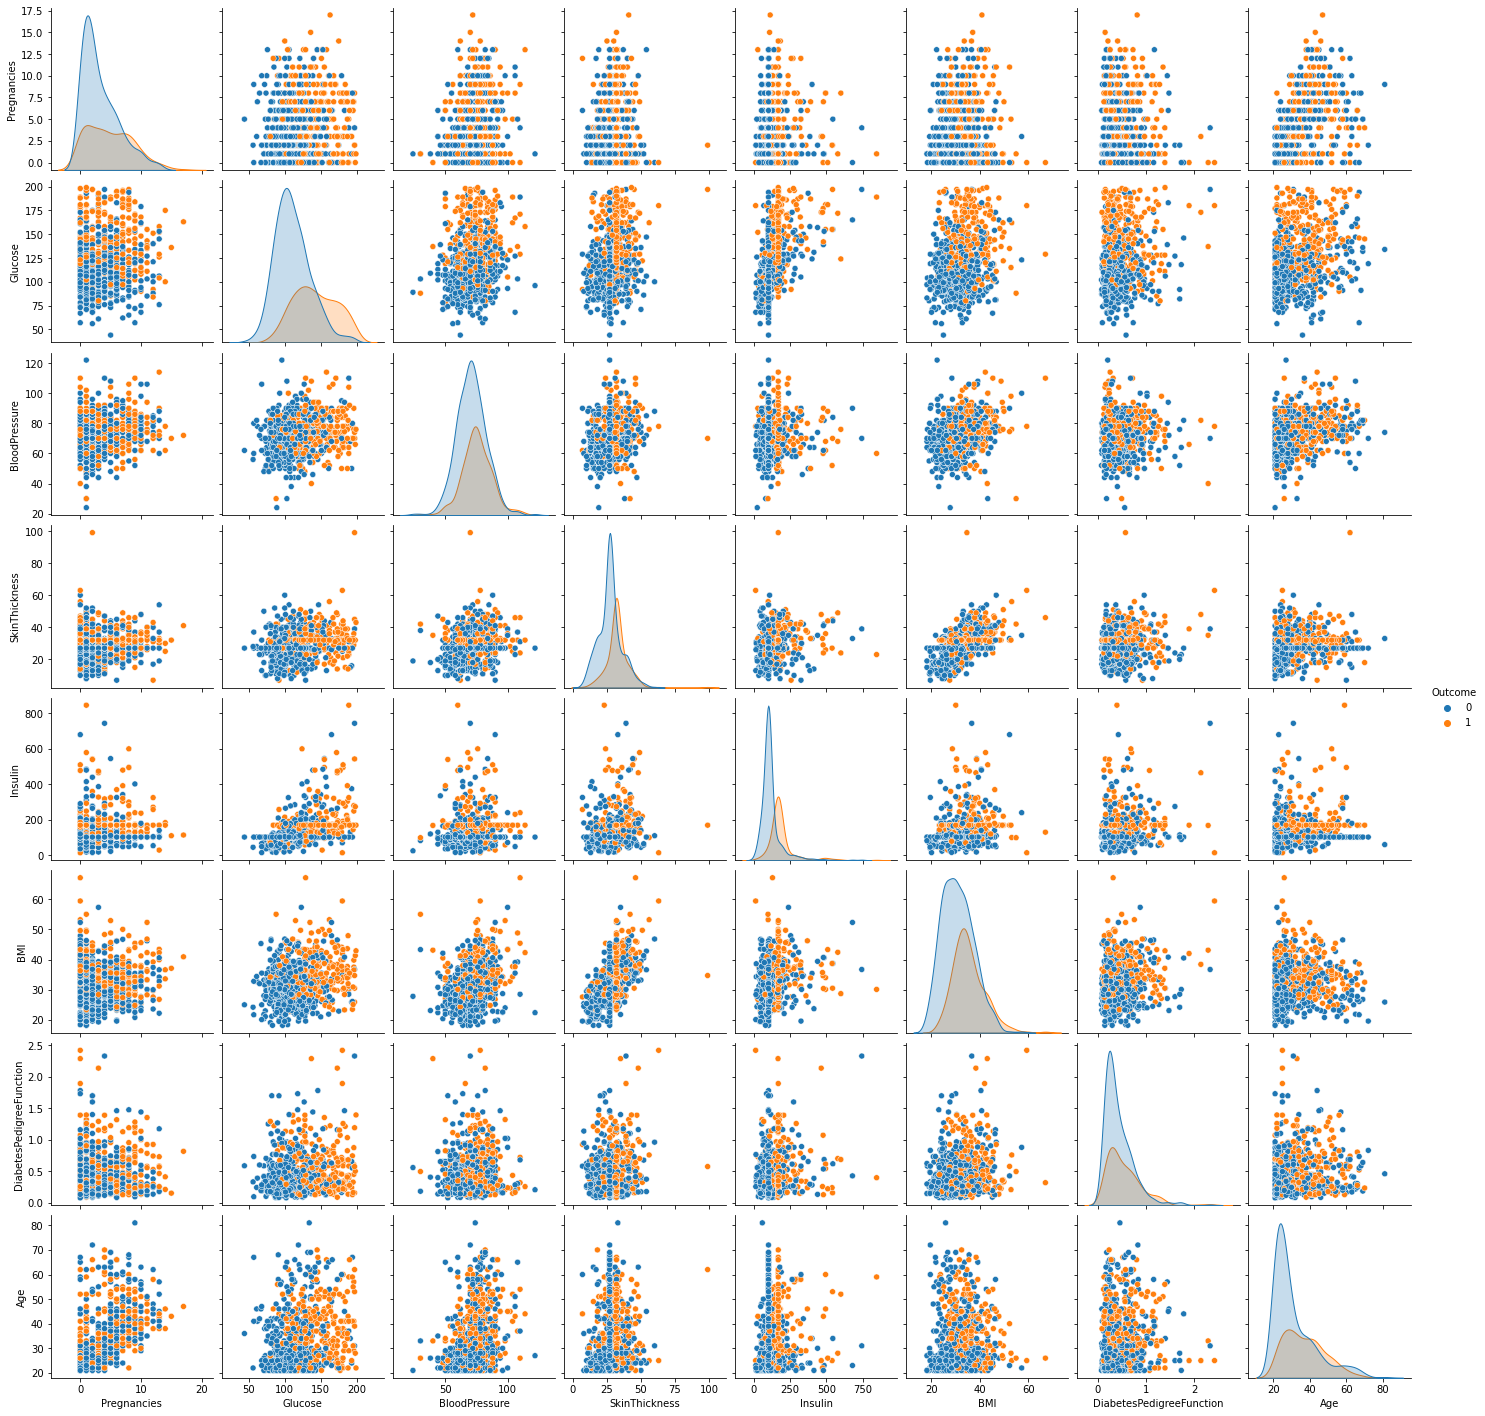

In [188]:
sns.pairplot(data=cleaned_df,hue='Outcome')

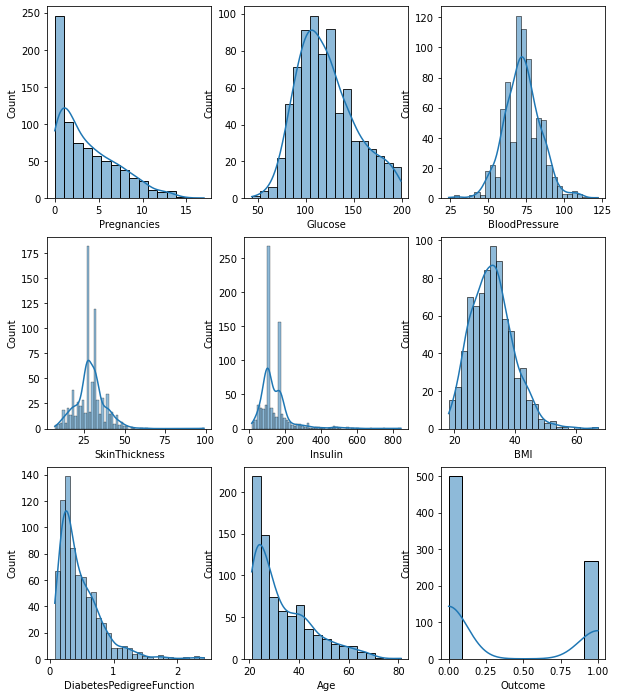

In [189]:
fig, axes = plt.subplots(nrows=3, ncols= 3, figsize=(10,12))
ax = axes.flatten()
count = 0

for col in cleaned_df.columns:
    sns.histplot(x=col, data=cleaned_df, kde=True, ax=ax[count])
    count += 1

Text(0.5, 0.98, 'Correlation Matrix')

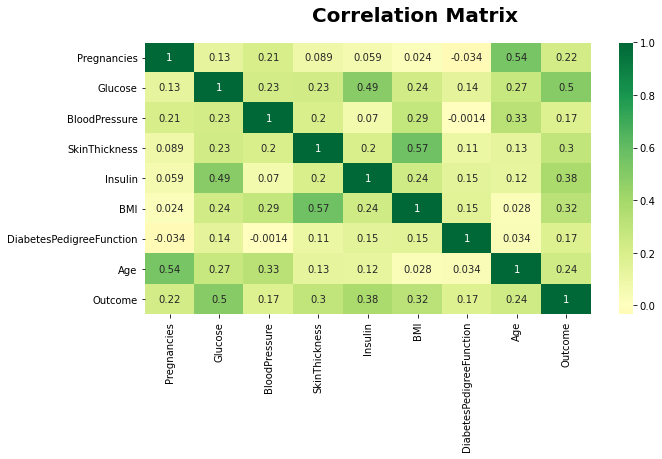

In [190]:
plt.figure(figsize=(10,5))
p=sns.heatmap(cleaned_df.corr(), annot=True,cmap='RdYlGn',center=0) 
plt.suptitle('Correlation Matrix', fontweight = 'bold', fontsize=20)


### Column Wrangling

In [191]:
encode_df = cleaned_df.copy()
encode_df['Glucose'] = pd.cut(encode_df['Glucose'], bins=[0,140,199], labels=['Normal', 'Intermediate'])
encode_df['Insulin'] = pd.cut(encode_df['Insulin'], bins=[0, 70, 140, 200, max(encode_df['Insulin'])], labels=['Low', 'Normal', 'High', 'Extremely High'])
encode_df['BloodPressure'] = pd.cut(encode_df['BloodPressure'], bins=[0, 60, 80, 90, 120, max(encode_df['BloodPressure'])], labels=['Low', 'Normal', 'Stage 1', 'Stage 2', 'Hypertensive'])
encode_df['BMI'] = pd.cut(encode_df['BMI'], bins=[0, 18.5, 25, 30, max(encode_df['BMI'])], labels=['Underweight', 'Healthy Weight', 'Overweight', 'Obesity'])
encode_df['Age'] = pd.cut(encode_df['Age'], bins=[15,25,65,100], labels=['Youth', 'Adult', 'Senior'])


In [192]:
level_dict = {'Outcome': [0,1], 'Glucose': ['Normal', 'Intermediate'],
             'Insulin': ['Low', 'Normal', 'High', 'Extremely High'],
             'BloodPressure': ['Low', 'Normal', 'Stage 1', 'Stage 2', 'Hypertensive'],
             'BMI': ['Underweight', 'Healthy Weight', 'Overweight', 'Obesity'],
             'Age':['Youth', 'Adult', 'Senior']}

In [193]:
encode_df.Outcome = encode_df.Outcome.astype('category')
encode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    category
 2   BloodPressure             768 non-null    category
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    category
 5   BMI                       768 non-null    category
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    category
 8   Outcome                   768 non-null    category
dtypes: category(6), float64(1), int64(2)
memory usage: 23.6 KB


In [194]:
interested_features = ['DiabetesPedigreeFunction', 'Outcome', 'Glucose', 'Insulin', 'BloodPressure', 'BMI', 'Age']
target_df = encode_df[interested_features]
target_df


DiabetesPedigreeFunction Outcome       Glucose Insulin BloodPressure  \
0                       0.627       1  Intermediate    High        Normal   
1                       0.351       0        Normal  Normal        Normal   
2                       0.672       1  Intermediate    High        Normal   
3                       0.167       0        Normal  Normal        Normal   
4                       2.288       1        Normal    High           Low   
..                        ...     ...           ...     ...           ...   
763                     0.171       0        Normal    High        Normal   
764                     0.340       0        Normal  Normal        Normal   
765                     0.245       0        Normal  Normal        Normal   
766                     0.349       1        Normal    High           Low   
767                     0.315       0        Normal  Normal        Normal   

                BMI    Age  
0           Obesity  Adult  
1        Overweight  Adult  
2    Healthy Weight  Adult  
3        Overweight  Youth  
4           Obesity  Adult  
..              ...    ...  
763         Obesity  Adult  
764         Obesity  Adult  
765      Overweight  Adult  
766         Obesity  Adult  
767         Obesity  Youth  

[768 rows x 7 columns]

In [195]:
for col in target_df.columns[1:]:
    print("Number of levels for", col, ":", target_df[col].value_counts().count())
    

Number of levels for Outcome : 2
Number of levels for Glucose : 2
Number of levels for Insulin : 4
Number of levels for BloodPressure : 5
Number of levels for BMI : 4
Number of levels for Age : 3


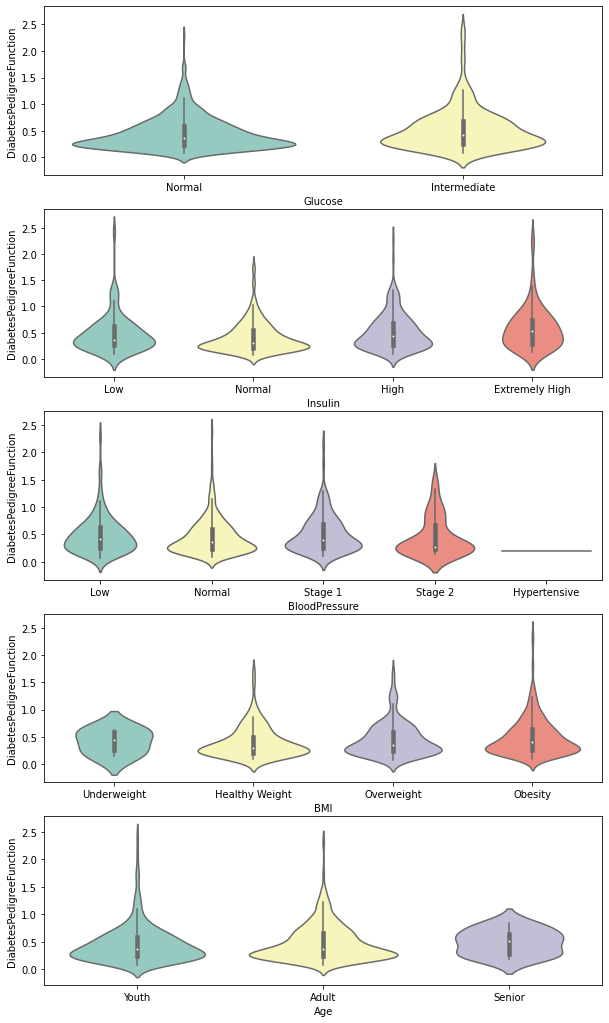

In [196]:
fig, axes = plt.subplots(nrows=5, ncols= 1, figsize=(10,18))
ax = axes.flatten()
count = 0

for numerical in range(0,1):
    for category in range(2, 7):
        sns.violinplot(x=target_df.columns[category], y=target_df.columns[numerical], data=target_df, ax=ax[count], palette='Set3')
        count +=1
        

### Normality Check

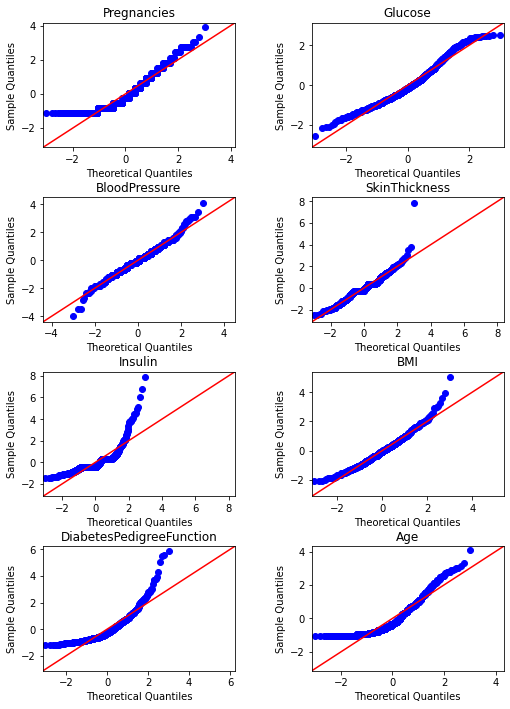

In [197]:
fig, axes = plt.subplots(nrows=4, ncols= 2, figsize=(8,10))
ax = axes.flatten()
for i in range(0, 8):
    sm.qqplot(cleaned_df.iloc[:,i], line='45', fit=True, dist=stats.norm, ax=ax[i])
    ax[i].set_title(cleaned_df.columns[i])

plt.subplots_adjust(left=0.1, bottom=0, right=0.9, top=0.9, wspace=0.4, hspace=0.4)    
plt.show()
    
    

In [198]:
alpha = 0.05
d = {'stats.normaltest':[], 'stats.jarque-bera': [], 'stats.kstest': []}
labels = []

for col in cleaned_df.columns:
    s1, pvalue1 = stats.normaltest(cleaned_df[[col]])
    s2, pvalue2 = stats.jarque_bera(cleaned_df[[col]])
    s3, pvalue3 = stats.kstest(cleaned_df[[col]], 'norm')
#     a = stats.anderson(cleaned_df[[col]], dist="norm")
    d['stats.normaltest'].append(pvalue1[0])
    d['stats.jarque-bera'].append(pvalue2)
    d['stats.kstest'].append(pvalue3)
    labels.append(col)
    
    print("Column:", col)
    
    print("stats.normaltest test statistic", s1, "p-value", pvalue1)
    if pvalue1 < alpha:
        print("The null hypothesis can be rejcted")
    else:
        print("The null hypothesis cannot be rejected")
        
    print("Jarque-Bera test statistic", s2, "p-value", pvalue2)
    if pvalue2 < alpha:
        print("The null hypothesis can be rejcted")
    else:
        print("The null hypothesis cannot be rejected")
        
    print("Kolmogorov-Smirnov test statistic", s3, "p-value", pvalue3)
    if pvalue3 < alpha:
        print("The null hypothesis can be rejcted")
    else:
        print("The null hypothesis cannot be rejected")
        
#     print("Anderson-Darling test")
#     if a[0] < a[1][2]:
#         print("The null hypothesis can be rejcted")
#     else:
#         print("The null hypothesis cannot be rejected")
    print()
print()


normaldf1 = pd.DataFrame(d, index=labels)
display(normaldf1)
print()

Column: Pregnancies
stats.normaltest test statistic [80.16379459] p-value [3.91429164e-18]
The null hypothesis can be rejcted
Jarque-Bera test statistic 104.38339113110155 p-value 0.0
The null hypothesis can be rejcted
Kolmogorov-Smirnov test statistic 1.0 p-value 0.0
The null hypothesis can be rejcted

Column: Glucose
stats.normaltest test statistic [35.50786078] p-value [1.94789705e-08]
The null hypothesis can be rejcted
Jarque-Bera test statistic 38.534952501369474 p-value 4.287867727548189e-09
The null hypothesis can be rejcted
Kolmogorov-Smirnov test statistic 1.0 p-value 0.0
The null hypothesis can be rejcted

Column: BloodPressure
stats.normaltest test statistic [20.68798602] p-value [3.21855485e-05]
The null hypothesis can be rejcted
Jarque-Bera test statistic 39.20465735577195 p-value 3.067727849526136e-09
The null hypothesis can be rejcted
Kolmogorov-Smirnov test statistic 1.0 p-value 0.0
The null hypothesis can be rejcted

Column: SkinThickness
stats.normaltest test statisti

stats.normaltest  stats.jarque-bera  stats.kstest
Pregnancies                   3.914292e-18       0.000000e+00           0.0
Glucose                       1.947897e-08       4.287868e-09           0.0
BloodPressure                 3.218555e-05       3.067728e-09           0.0
SkinThickness                 1.552684e-35       0.000000e+00           0.0
Insulin                      1.891702e-116       0.000000e+00           0.0
BMI                           9.125612e-13       1.110223e-16           0.0
DiabetesPedigreeFunction      1.298770e-70       0.000000e+00           0.0
Age                           9.308980e-27       0.000000e+00           0.0
Outcome                       0.000000e+00       0.000000e+00           0.0

### Equal Variances Test

In [199]:
alpha = 0.05
res = stat()
for category in target_df.columns[1:]:
    gb = target_df.groupby(category)
    for column in range(0, 1):
        print(category, "V.S.", target_df.columns[column])
        res.levene(df=target_df, res_var=target_df.columns[column], xfac_var=category)
        display(res.levene_summary)
#         statistic, pvalue = stats.levene(gb.get_group(level_dict[feature][0]).iloc[:,[column]].values.flatten(), gb.get_group(level_dict[feature][1]).iloc[:,[column]].values.flatten(), center='mean')
#         print("Test Statistic:", statistic, "P-Value:", pvalue)
#         if pvalue < alpha:
#             print("The null hypothesis can be rejcted\n")
#         else:
#             print("Fail to reject the null hypothesis\n")
        print()


Outcome V.S. DiabetesPedigreeFunction


Parameter    Value
0      Test statistics (W)  11.7976
1  Degrees of freedom (Df)   1.0000
2                  p value   0.0006


Glucose V.S. DiabetesPedigreeFunction


Parameter   Value
0      Test statistics (W)  6.1906
1  Degrees of freedom (Df)  1.0000
2                  p value  0.0131


Insulin V.S. DiabetesPedigreeFunction


Parameter   Value
0      Test statistics (W)  3.7937
1  Degrees of freedom (Df)  3.0000
2                  p value  0.0102


BloodPressure V.S. DiabetesPedigreeFunction


Parameter   Value
0      Test statistics (W)  0.3993
1  Degrees of freedom (Df)  4.0000
2                  p value  0.8092


BMI V.S. DiabetesPedigreeFunction


Parameter   Value
0      Test statistics (W)  1.1733
1  Degrees of freedom (Df)  3.0000
2                  p value  0.3189


Age V.S. DiabetesPedigreeFunction


Parameter   Value
0      Test statistics (W)  0.3875
1  Degrees of freedom (Df)  2.0000
2                  p value  0.6789

## t-test

In [200]:
alpha = 0.05
for feature in target_df.columns[1:3]:
    gb = target_df.groupby(feature)
    for col in target_df.columns[:1]:
        print(feature, "V.S.", col)
        print("H0: the average of {} in the group of {} = {} == that of the group of {} = {}".format(col, feature, level_dict[feature][0], feature, level_dict[feature][1]))
        print("Ha: the average of {} in the group of {} = {} != that of the group of {} = {}".format(col, feature, level_dict[feature][0], feature, level_dict[feature][1]))
        statistic, pvalue = stats.ttest_ind(a=gb.get_group(level_dict[feature][0])[col], b=gb.get_group(level_dict[feature][1])[col], equal_var=False)
        print("p-value:", pvalue)
        if pvalue < alpha:
            print("The null hypothesis can be rejcted\n")
        else:
            print("Fail to reject the null hypothesis\n")
    
    

Outcome V.S. DiabetesPedigreeFunction
H0: the average of DiabetesPedigreeFunction in the group of Outcome = 0 == that of the group of Outcome = 1
Ha: the average of DiabetesPedigreeFunction in the group of Outcome = 0 != that of the group of Outcome = 1
p-value: 6.1004814242403285e-06
The null hypothesis can be rejcted

Glucose V.S. DiabetesPedigreeFunction
H0: the average of DiabetesPedigreeFunction in the group of Glucose = Normal == that of the group of Glucose = Intermediate
Ha: the average of DiabetesPedigreeFunction in the group of Glucose = Normal != that of the group of Glucose = Intermediate
p-value: 0.009625791854411469
The null hypothesis can be rejcted



### One-Way ANOVA & Post hoc tests

In [204]:
for independent in target_df.columns[3:]:
    for dependent in target_df.columns[:1]:
        print(dependent, "V.S.", independent)
        model = ols('{} ~ {}'.format(dependent, independent), data=target_df.loc[:, [dependent, independent]]).fit()
        display(sm.stats.anova_lm(model, typ=2))
        display(model.t_test_pairwise(independent).result_frame)
#         print()


DiabetesPedigreeFunction V.S. Insulin


sum_sq     df         F    PR(>F)
Insulin    2.906833    3.0  9.106196  0.000006
Residual  81.293382  764.0       NaN       NaN

coef   std err         t     P>|t|  Conf. Int. Low  \
Normal-Low            -0.066808  0.039683 -1.683564  0.092675       -0.144708   
High-Low               0.038978  0.042284  0.921811  0.356918       -0.044029   
Extremely High-Low     0.105768  0.050492  2.094755  0.036522        0.006649   
High-Normal            0.105787  0.027703  3.818632  0.000145        0.051404   
Extremely High-Normal  0.172577  0.039101  4.413572  0.000012        0.095818   
Extremely High-High    0.066790  0.041739  1.600177  0.109973       -0.015147   

                       Conf. Int. Upp.  pvalue-hs  reject-hs  
Normal-Low                    0.011092   0.253054      False  
High-Low                      0.121986   0.356918      False  
Extremely High-Low            0.204888   0.138276      False  
High-Normal                   0.160169   0.000725       True  
Extremely High-Normal         0.249336   0.000070       True  
Extremely High-High           0.148728   0.253054      False

DiabetesPedigreeFunction V.S. BloodPressure


sum_sq     df        F    PR(>F)
BloodPressure   0.457296    4.0  1.04163  0.384704
Residual       83.742920  763.0      NaN       NaN

coef   std err         t     P>|t|  Conf. Int. Low  \
Normal-Low           -0.029386  0.033481 -0.877701  0.380382       -0.095112   
Stage 1-Low           0.028704  0.041911  0.684891  0.493621       -0.053570   
Stage 2-Low          -0.036796  0.062118 -0.592360  0.553785       -0.158739   
Hypertensive-Low     -0.280634  0.332637 -0.843666  0.399121       -0.933626   
Stage 1-Normal        0.058091  0.033059  1.757206  0.079284       -0.006806   
Stage 2-Normal       -0.007410  0.056524 -0.131095  0.895734       -0.118372   
Hypertensive-Normal  -0.251248  0.331638 -0.757598  0.448926       -0.902278   
Stage 2-Stage 1      -0.065501  0.061891 -1.058316  0.290246       -0.186999   
Hypertensive-Stage 1 -0.309339  0.332594 -0.930078  0.352625       -0.962247   
Hypertensive-Stage 2 -0.243838  0.335740 -0.726270  0.467896       -0.902921   

                      Conf. Int. Upp.  pvalue-hs  reject-hs  
Normal-Low                   0.036339   0.969151      False  
Stage 1-Low                  0.110979   0.969151      False  
Stage 2-Low                  0.085146   0.969151      False  
Hypertensive-Low             0.372357   0.969151      False  
Stage 1-Normal               0.122987   0.562218      False  
Stage 2-Normal               0.103552   0.969151      False  
Hypertensive-Normal          0.399782   0.969151      False  
Stage 2-Stage 1              0.055997   0.954295      False  
Hypertensive-Stage 1         0.343570   0.969151      False  
Hypertensive-Stage 2         0.415245   0.969151      False

DiabetesPedigreeFunction V.S. BMI


sum_sq     df         F    PR(>F)
BMI        0.867638    3.0  2.651525  0.047724
Residual  83.332578  764.0       NaN       NaN

coef   std err         t     P>|t|  \
Healthy Weight-Underweight -0.009222  0.168162 -0.054841  0.956279   
Overweight-Underweight      0.037756  0.166957  0.226140  0.821153   
Obesity-Underweight         0.082809  0.165824  0.499377  0.617657   
Overweight-Healthy Weight   0.046978  0.040198  1.168648  0.242910   
Obesity-Healthy Weight      0.092031  0.035201  2.614463  0.009113   
Obesity-Overweight          0.045053  0.028898  1.559026  0.119404   

                            Conf. Int. Low  Conf. Int. Upp.  pvalue-hs  \
Healthy Weight-Underweight       -0.339337         0.320892   0.968014   
Overweight-Underweight           -0.289992         0.365504   0.968014   
Obesity-Underweight              -0.242716         0.408334   0.944107   
Overweight-Healthy Weight        -0.031935         0.125890   0.671459   
Obesity-Healthy Weight            0.022929         0.161133   0.053447   
Obesity-Overweight               -0.011676         0.101783   0.470480   

                            reject-hs  
Healthy Weight-Underweight      False  
Overweight-Underweight          False  
Obesity-Underweight             False  
Overweight-Healthy Weight       False  
Obesity-Healthy Weight          False  
Obesity-Overweight              False

DiabetesPedigreeFunction V.S. Age


sum_sq     df         F    PR(>F)
Age        0.096236    2.0  0.437676  0.645696
Residual  84.103979  765.0       NaN       NaN

coef   std err         t     P>|t|  Conf. Int. Low  \
Adult-Youth   0.023028  0.025240  0.912370  0.361862       -0.026519   
Senior-Youth  0.034103  0.094174  0.362124  0.717359       -0.150767   
Senior-Adult  0.011075  0.093178  0.118853  0.905423       -0.171841   

              Conf. Int. Upp.  pvalue-hs  reject-hs  
Adult-Youth          0.072575   0.740137      False  
Senior-Youth         0.218972   0.920114      False  
Senior-Adult         0.193990   0.920114      False

### Two-Way ANOVA

In [22]:
for dependent in range(0,1):
    for i in range(1, 6):
        for j in range(i+1, 7):
            m = '{0} ~ C({1}) + C({2}) + C({1}):C({2})'.format(target_df.columns[dependent], target_df.columns[i], target_df.columns[j])
            print(m)
            model = ols(m, data=target_df).fit()
            anova_table = sm.stats.anova_lm(model, typ=2)
            print(anova_table)
            print()

            

DiabetesPedigreeFunction ~ C(Outcome) + C(Glucose) + C(Outcome):C(Glucose)
                          sum_sq     df          F    PR(>F)
C(Outcome)              1.715969    1.0  16.118701  0.000065
C(Glucose)              0.124964    1.0   1.173833  0.278957
C(Outcome):C(Glucose)   0.196475    1.0   1.845557  0.174702
Residual               81.334098  764.0        NaN       NaN

DiabetesPedigreeFunction ~ C(Outcome) + C(Insulin) + C(Outcome):C(Insulin)
                          sum_sq     df         F    PR(>F)
C(Outcome)              0.847754    1.0  8.190914  0.004326
C(Insulin)              1.209908    3.0  3.896671  0.008851
C(Outcome):C(Insulin)   1.786144    3.0  5.752515  0.000682
Residual               78.659484  760.0       NaN       NaN

DiabetesPedigreeFunction ~ C(Outcome) + C(BloodPressure) + C(Outcome):C(BloodPressure)
                                sum_sq     df         F    PR(>F)
C(Outcome)                         NaN    1.0       NaN       NaN
C(BloodPressure)        

## Multiple Linear Regression

In [23]:
from sklearn.model_selection import train_test_split
X = cleaned_df.loc[:, interested_features[1:]]
y = target_df.loc[:, interested_features[0]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# making predictions
y_pred = regressor.predict(X_test)



In [25]:
coeff_paras = pd.DataFrame(np.append(regressor.intercept_,regressor.coef_), np.append(['Interception'], X.columns), columns=['Coefficient'])
coeff_paras


Coefficient
Interception      0.309536
Outcome           0.064097
Glucose           0.000186
Insulin           0.000304
BloodPressure    -0.001994
BMI               0.006157
Age               0.000350

In [26]:
from sklearn import metrics

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE) for MLR: %.3f" % (rmse))
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE) for MLR: %.3f" % (mae))
adjusted_r2 = 1 - (1-regressor.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R squared for MLR: %.3f" % (adjusted_r2))
r2 = metrics.r2_score(y_test, y_pred)
print("R squared for MLR: %.3f" % (r2))



Root Mean Squared Error (RMSE) for MLR: 0.317
Mean Absolute Error (MAE) for MLR: 0.237
Adjusted R squared for MLR: 0.042
R squared for MLR: 0.037


<AxesSubplot:ylabel='DiabetesPedigreeFunction'>

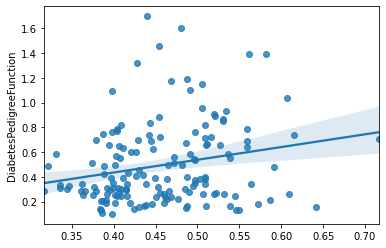

In [27]:
sns.regplot(y_pred, y_test)


In [179]:
interested_features = ['DiabetesPedigreeFunction', 'Outcome', 'Glucose', 'Insulin', 'BloodPressure', 'BMI', 'Age']
target_df = cleaned_df[interested_features]
ols_lr = ols(formula='DiabetesPedigreeFunction ~ Outcome + Glucose + Insulin + BloodPressure + BMI + Age', data=target_df, subset=None, drop_cols=None)
ols_result = ols_lr.fit()
print(ols_result.summary())


                               OLS Regression Results                               
Dep. Variable:     DiabetesPedigreeFunction   R-squared:                       0.051
Model:                                  OLS   Adj. R-squared:                  0.043
Method:                       Least Squares   F-statistic:                     6.814
Date:                      Tue, 12 Apr 2022   Prob (F-statistic):           4.71e-07
Time:                              22:51:43   Log-Likelihood:                -220.78
No. Observations:                       768   AIC:                             455.6
Df Residuals:                           761   BIC:                             488.1
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

<bound method Figure.show of <Figure size 1296x864 with 7 Axes>>

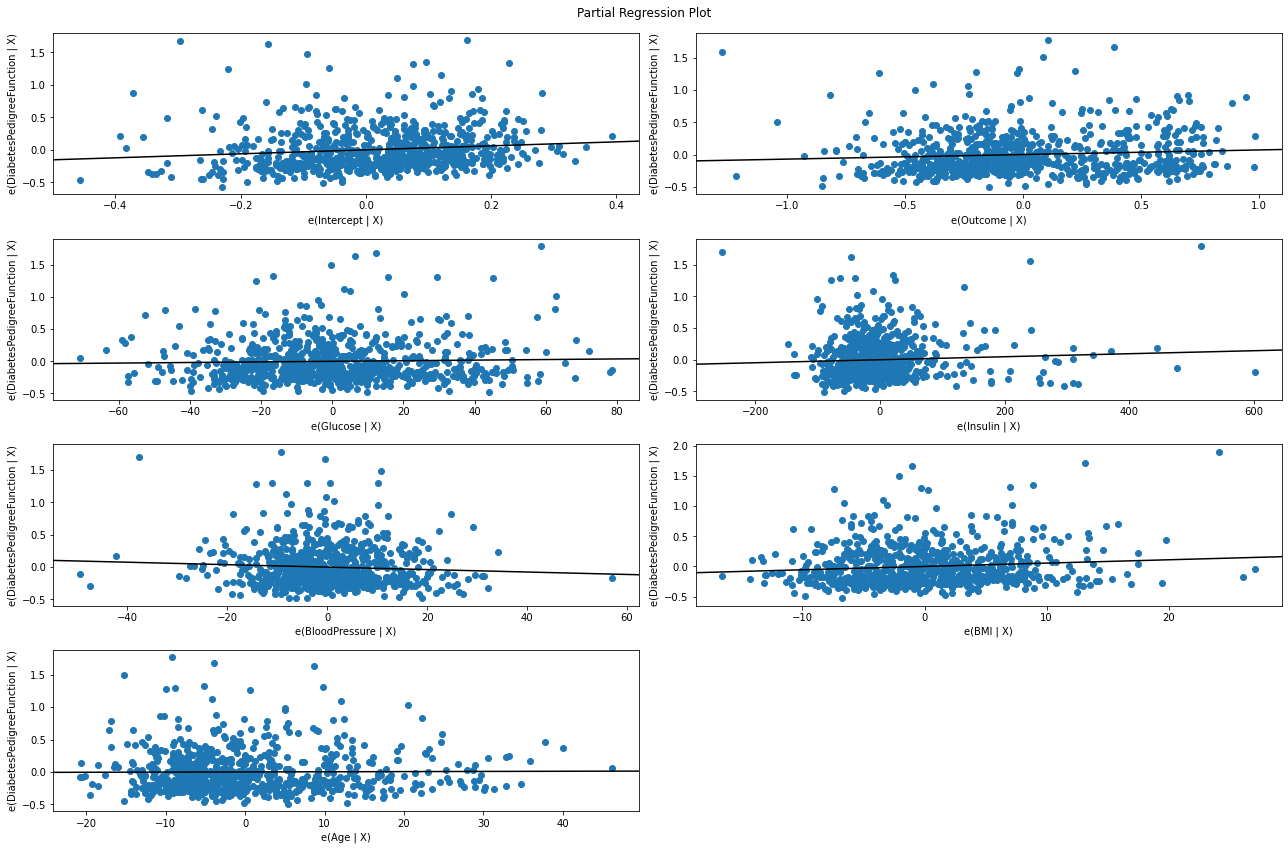

In [180]:
# Partial Regression Plot
ancova_plot = plt.figure(figsize=(18, 12))
ancova_plot = sm.graphics.plot_partregress_grid(ols_result, fig=ancova_plot)
ancova_plot.show


In [182]:
aov = sm.stats.anova_lm(ols_result, typ=2)
aov

sum_sq     df         F    PR(>F)
Outcome         0.603519    1.0  5.747620  0.016751
Glucose         0.092400    1.0  0.879974  0.348507
Insulin         0.248092    1.0  2.362705  0.124682
BloodPressure   0.323984    1.0  3.085465  0.079397
BMI             0.900392    1.0  8.574894  0.003510
Age             0.005857    1.0  0.055777  0.813363
Residual       79.907491  761.0       NaN       NaN

## ANCOVA

In [155]:
# since p-value for Outcome and BMI are significant, we proceed with these two variables only
interested_features = ['DiabetesPedigreeFunction', 'Outcome', 'BMI']

# dependent variable: DiabetesPedigreeFunction
# independent variable: Outcome
# covariant: BMI

target_df = cleaned_df[interested_features]
target_df['Outcome'] = target_df['Outcome'].astype('category')
target_df

DiabetesPedigreeFunction Outcome   BMI
0                       0.627       1  33.6
1                       0.351       0  26.6
2                       0.672       1  23.3
3                       0.167       0  28.1
4                       2.288       1  43.1
..                        ...     ...   ...
763                     0.171       0  32.9
764                     0.340       0  36.8
765                     0.245       0  26.2
766                     0.349       1  30.1
767                     0.315       0  30.4

[768 rows x 3 columns]

In [156]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   DiabetesPedigreeFunction  768 non-null    float64 
 1   Outcome                   768 non-null    category
 2   BMI                       768 non-null    float64 
dtypes: category(1), float64(2)
memory usage: 13.0 KB


In [157]:
target_df.describe()

DiabetesPedigreeFunction         BMI
count                768.000000  768.000000
mean                   0.471876   32.434635
std                    0.331329    6.880498
min                    0.078000   18.200000
25%                    0.243750   27.500000
50%                    0.372500   32.050000
75%                    0.626250   36.600000
max                    2.420000   67.100000

##### OLS

In [146]:
ols_lr = ols(formula='DiabetesPedigreeFunction ~ Outcome + BMI', data=target_df, subset=None, drop_cols=None)
ols_result = ols_lr.fit()
print(ols_result.summary())


                               OLS Regression Results                               
Dep. Variable:     DiabetesPedigreeFunction   R-squared:                       0.041
Model:                                  OLS   Adj. R-squared:                  0.038
Method:                       Least Squares   F-statistic:                     16.30
Date:                      Tue, 12 Apr 2022   Prob (F-statistic):           1.17e-07
Time:                              13:46:23   Log-Likelihood:                -224.85
No. Observations:                       768   AIC:                             455.7
Df Residuals:                           765   BIC:                             469.6
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

<bound method Figure.show of <Figure size 1296x864 with 3 Axes>>

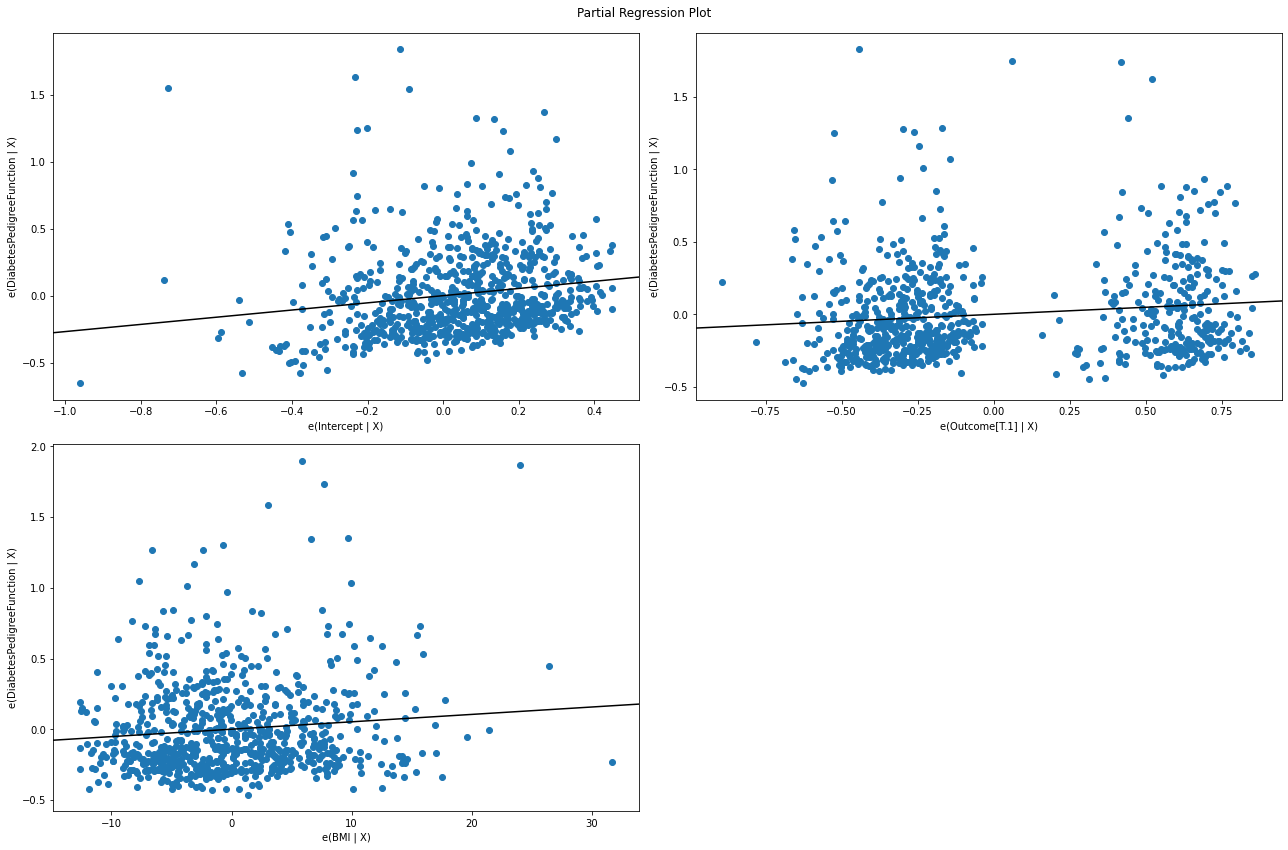

In [134]:
# Partial Regression Plot
ancova_plot = plt.figure(figsize=(18, 12))
ancova_plot = sm.graphics.plot_partregress_grid(ols_result, fig=ancova_plot)
ancova_plot.show


------
### Assumption Check:
##### 1. Normality Check
checking the normality of the dependent variable for each of category of independent variables.

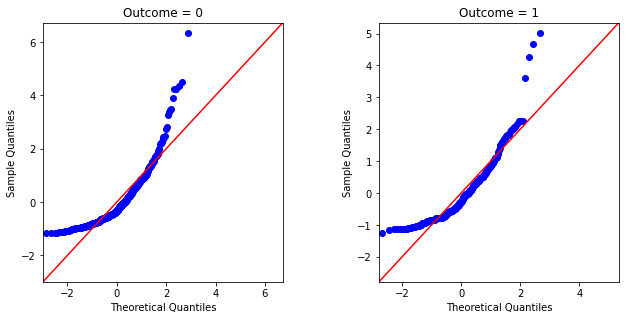

In [41]:
fig, axes = plt.subplots(nrows=1, ncols= 2, figsize=(10,4))
ax = axes.flatten()

for i in range(2):
    sm.qqplot(target_df.groupby('Outcome').get_group(i).DiabetesPedigreeFunction, line='45', fit=True, dist=stats.norm, ax=ax[i])
    ax[i].set_title('Outcome = {}'.format(i))

plt.subplots_adjust(left=0.1, bottom=0, right=0.9, top=0.9, wspace=0.4, hspace=0.4)    
plt.show()


In [102]:
alpha = 0.05
d = {'stats.normaltest':[]}
labels = []

for i in range(2):
    statistic, pvalue = stats.normaltest(target_df.groupby('Outcome').get_group(i).DiabetesPedigreeFunction)
    print("Outcome = {}".format(i))
    print("Test Statistic:", statistic, "P-value:", pvalue)
    d['stats.normaltest'].append(pvalue)
    labels.append('DiabetesPedigreeFunction for Outcome = {}'.format(i))
print()


normaldf1 = pd.DataFrame(d, index=labels)
display(normaldf1)
print()

Outcome = 0
Test Statistic: 226.74553231264684 P-value: 5.792062775747433e-50
Outcome = 1
Test Statistic: 105.52135521984597 P-value: 1.2199129807413438e-23



stats.normaltest
DiabetesPedigreeFunction for Outcome = 0      5.792063e-50
DiabetesPedigreeFunction for Outcome = 1      1.219913e-23

##### 2. Linearity Check
Checking the linearity of the covariate and dependent variable at each level of independent variable.

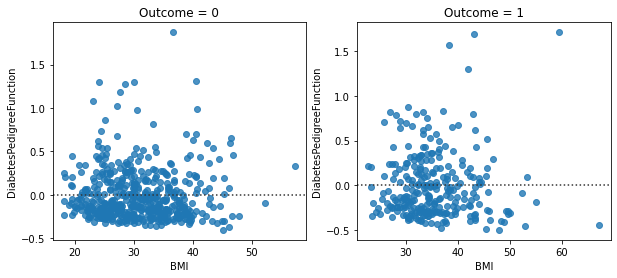

In [128]:
# residual plots
fig, axes = plt.subplots(nrows=1, ncols= 2, figsize=(10,4))
ax = axes.flatten()
count = 0
for covariate in interested_features[2:]:
    for i in range(2):
        level_df = target_df.loc[target_df.Outcome == i, :]
    #     X = level_df.Insulin.values.reshape((-1,1))
    #     linear_model.fit(X, level_df.DiabetesPedigreeFunction)
    #     linear_r2 = linear_model.score(level_df.Insulin, level_df.DiabetesPedigreeFunction)
    #     print('R^2 for Insulin and DiabetesPedigreeFunction at Oucome = {0}: {1}'.format(i, linear_r2))
        sns.residplot(x=covariate, y=interested_features[0], data=level_df, ax=ax[count])
        ax[i].set_title('Outcome = {}'.format(i))
        count += 1


##### 3. homogeneity of variance
see previous results

##### 4. homogeneity of regression slopes

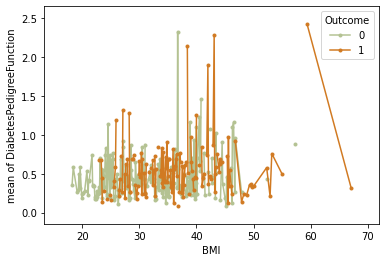

In [152]:
from statsmodels.graphics.factorplots import interaction_plot
#interaction plot
fig = interaction_plot(x=target_df['BMI'], trace=target_df['Outcome'], response=target_df['DiabetesPedigreeFunction'], 
    colors=['#b4c292','#d17a22'])
plt.show()

Assumption Check Over

--------

In [158]:
from pingouin import ancova
ancova_model = ancova(data=target_df, dv='DiabetesPedigreeFunction', covar=interested_features[2:], between='Outcome',
       effsize='np2')
print(ancova_model)


     Source         SS   DF          F     p-unc       np2
0   Outcome   1.475983    1  13.981420  0.000198  0.017948
1       BMI   0.896440    1   8.491637  0.003672  0.010978
2  Residual  80.759096  765        NaN       NaN       NaN


In [160]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
mc = pairwise_tukeyhsd(target_df['DiabetesPedigreeFunction'], target_df['Outcome'], alpha=0.05)
print(mc)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1   0.1208 0.001 0.0722 0.1693   True
-------------------------------------------------


## Power Analysis

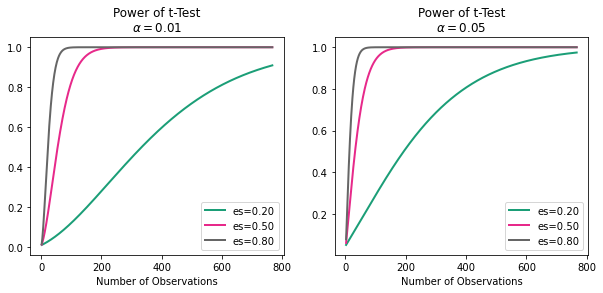

In [176]:
# power vs. number of observations 
fig, axes = plt.subplots(nrows=1, ncols= 2, figsize=(10,4))
ax = axes.flatten()
power_analysis = TTestIndPower()
alpha = [0.01, 0.05]
sample_sizes = np.arange(2, 768)
effect_sizes = np.array([0.2, 0.5, 0.8])

for i in range(len(alpha)):
    fig = power_analysis.plot_power(dep_var='nobs',
                                 nobs= sample_sizes,
                                 effect_size=effect_sizes,
                                 alpha=alpha[i],
                                 ax=ax[i], title='Power of t-Test' + '\n' + r'$\alpha = {}$'.format(alpha[i]))

#     plt.hlines(ymin = 0, ymax = 1.0, x = , color = 'r', linestyles = 'dashed')
    
    

In [174]:
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = 0.8, 
                                         power = 0.8, 
                                         alpha = 0.05)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 25.52
